## PHYS-85200 - Machine Learning for Physicists
### Student: Gehan Ranepura
### Worksheet #5

In [329]:
import pandas as pd
import numpy as np
import sklearn.tree
from mlxtend.plotting import plot_decision_regions #New!
from sklearn.cluster import DBSCAN #New!
from sklearn.cluster import OPTICS #New!
from sklearn.cluster import KMeans #New!
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, decomposition #New!
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import linear_model #New!
from sklearn.linear_model import RidgeCV #New!
from sklearn.linear_model import Ridge, Lasso, LassoCV #New!
from sklearn import metrics 
from sklearn.pipeline import make_pipeline
from scipy import stats

from io import StringIO  
from IPython.display import Image  
import pydotplus

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
font = {'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams['figure.dpi'] = 300

Pick a data set of your choice where you think clustering can work (i.e. the data contain well defined groups), AND there is of way of checking how well it is working (for example, it's an actually supervised problem so labels are available, or it's made of images so you have a visual check). 

The data set can be any publicly available data set (Google, Kaggle, or the UC Irvine repository have a lot of them), or a data set that you are familiar with from your research, or a data set we have previously worked with in this class. I don't really care that it's very complex, just looking forward to seeing something new; in fact, simple data sets work best for our purposes, so don't waste a lot of time looking for something super fancy.

1. Decide (and justify) how may clusters you will look for (if you are not sure, it's ok to guess and see!)
2. Apply k-means clustering and make clusters.
3. Discuss your results - are they good or bad? (we don't have a metric, which is why examining your "cheat labels" or visual inspection is helpful). 
- Are the objects in the same cluster similar to each other? 
- Are they different from the ones in other clusters? Is the number of clusters you picked a good choice? Why or why not? etc.
4. Build an elbow curve for your clustering scheme. How many clusters does the elbow suggest? 
- Does this make sense, based on what you know?
5. Take a look at other clustering algorithms on sklearn: 

https://scikit-learn.org/stable/modules/clustering.html

Pick one of your choice and apply it to the same data set. Compare the results with k-means and comment on the similarities/differences.

#### Goal: What I wanted to do was to try to use this HW as opportunity to use ML in my own research for detecting how well sequences for a protein that many organisms share are conserved around a particular region (the active site)

#### Troubles: Defining the labels for these sequences was not available so wasted quite a bit of time trying to get/make them, but alas it won't be done in time.

#### Instead I used a dataset from a coworker where he wants to see if amino acid seqeunces associated with the energy of the folded state of the protein can we classified well using ML.

#### Thus, the features of the dataset are 16 mutatable sites and the 10 targets are energy thresholds (kcal/mol) I chose as.
    10 = (master['Energy'] >     0),
     9 = (master['Energy'] <     0) & (master['Energy'] >=   -25),
     8 = (master['Energy'] <   -25) & (master['Energy'] >=   -50),
     7 = (master['Energy'] <   -50) & (master['Energy'] >=  -100),
     6 = (master['Energy'] <  -100) & (master['Energy'] >=  -200),
     5 = (master['Energy'] <  -200) & (master['Energy'] >=  -500),
     4 = (master['Energy'] <  -500) & (master['Energy'] >=  -750),
     3 = (master['Energy'] <  -750) & (master['Energy'] >= -1000),
     2 = (master['Energy'] < -1000) & (master['Energy'] >= -1500),
     1 = (master['Energy'] < -1500) & (master['Energy'] >= -1750),
     0 = (master['Energy'] < -1750) & (master['Energy'] >= -2000)

In [20]:
df = pd.read_csv("dataframe.txt")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
df.head()

,SeqID,Energy,Energy_range,resi 1,resi 2,resi 3,resi 4,resi 5,resi 6,resi 7,resi 8,resi 9,resi 10,resi 11,resi 12,resi 13,resi 14,resi 15,resi 16,resi 17,resi 18,resi 19,resi 20,resi 21,resi 22,resi 23,resi 24,resi 25,resi 26,resi 27,resi 28,resi 29,resi 30,resi 31,resi 32,resi 33,resi 34,resi 35,resi 36,resi 37,resi 38,resi 39,resi 40,resi 41,resi 42,resi 43,resi 44,resi 45,resi 46,resi 47,resi 48,resi 49,resi 50,resi 51,resi 52,resi 53,resi 54,resi 55,resi 56,resi 57,resi 58,resi 59,resi 60,resi 61,resi 62,resi 63,resi 64,resi 65,resi 66,resi 67,resi 68,resi 69,resi 70,resi 71,resi 72,resi 73,resi 74,resi 75,resi 76,resi 77,resi 78,resi 79,resi 80,resi 81,resi 82,resi 83,resi 84,resi 85,resi 86,resi 87,resi 88,resi 89,resi 90,resi 91,resi 92,resi 93,resi 94,resi 95,resi 96,resi 97,resi 98,resi 99,resi 100,resi 101,resi 102,resi 103,resi 104,resi 105,resi 106,resi 107,resi 108,resi 109,resi 110,resi 111,resi 112,resi 113,resi 114,resi 115,resi 116,resi 117,resi 118,resi 119,resi 120,resi 121,resi 122,resi 123,resi 124,resi 125,resi 126,resi 127,resi 128,resi 129,resi 130,resi 131,resi 132,resi 133,resi 134,resi 135,resi 136,resi 137,resi 138,resi 139,resi 140,resi 141,resi 142,resi 143,resi 144,resi 145,resi 146,resi 147,resi 148,resi 149,resi 150,resi 151,resi 152,resi 153,resi 154,resi 155,resi 156,resi 157,resi 158,resi 159,resi 160,resi 161,resi 162,resi 163,resi 164,resi 165,resi 166,resi 167,resi 168,resi 169,resi 170,resi 171,resi 172,resi 173,resi 174,resi 175
0,1681392955,89664.300,10,14,10,20,20,2,7,18,20,2,18,18,15,1,18,11,2,18,18,2,1,18,20,10,2,18,2,1,18,2,2,18,18,15,1,18,11,3,18,18,2,1,1,14,1,1,10,18,18,1,10,18,20,13,12,18,2,1,18,2,7,18,18,15,10,18,20,19,18,18,2,10,18,20,13,12,18,2,1,18,11,10,18,11,16,1,1,1,14,1,1,14,6,20,11,2,7,18,20,2,18,18,15,3,18,20,3,18,18,2,7,18,20,20,12,18,2,10,18,2,3,18,18,15,2,18,20,10,18,18,2,1,1,14,1,1,2,18,18,2,3,18,11,2,12,18,2,1,18,2,1,18,18,15,2,18,11,2,18,18,2,3,18,11,13,12,18,2,10,18,20,3,18,11,16,1
1,1681393018,707.474,10,14,10,20,20,2,7,18,20,2,18,18,15,1,18,11,7,18,18,2,2,18,20,1,2,18,2,7,18,2,2,18,18,15,1,18,11,3,18,18,2,1,1,14,1,1,10,18,18,1,10,18,20,13,12,18,2,1,18,2,10,18,18,15,6,18,20,19,18,18,2,10,18,20,13,12,18,2,1,18,11,10,18,11,16,1,1,1,14,1,1,14,6,20,11,2,7,18,20,2,18,18,15,3,18,20,10,18,18,2,3,18,20,20,12,18,2,6,18,2,3,18,18,15,2,18,20,10,18,18,2,1,1,14,1,1,2,18,18,2,3,18,11,2,12,18,2,1,18,2,3,18,18,15,2,18,11,1,18,18,2,2,18,11,13,12,18,2,10,18,20,3,18,11,16,1
2,1681393124,694.734,10,14,10,20,20,2,7,18,20,2,18,18,15,1,18,11,7,18,18,2,10,18,20,3,2,18,2,6,18,2,2,18,18,15,1,18,11,3,18,18,2,1,1,14,1,1,10,18,18,1,10,18,20,13,12,18,2,1,18,2,6,18,18,15,10,18,20,19,18,18,2,3,18,20,13,12,18,2,1,18,11,10,18,11,16,1,1,1,14,1,1,14,6,20,11,2,7,18,20,2,18,18,15,6,18,20,2,18,18,2,6,18,20,20,12,18,2,2,18,2,3,18,18,15,2,18,20,10,18,18,2,1,1,14,1,1,2,18,18,2,3,18,11,2,12,18,2,1,18,2,2,18,18,15,2,18,11,7,18,18,2,2,18,11,13,12,18,2,10,18,20,3,18,11,16,1
3,1681393186,-1041.240,2,14,10,20,20,2,7,18,20,2,18,18,15,1,18,11,3,18,18,2,2,18,20,1,2,18,2,6,18,2,2,18,18,15,1,18,11,3,18,18,2,1,1,14,1,1,10,18,18,1,10,18,20,13,12,18,2,1,18,2,6,18,18,15,3,18,20,19,18,18,2,6,18,20,13,12,18,2,1,18,11,10,18,11,16,1,1,1,14,1,1,14,6,20,11,2,7,18,20,2,18,18,15,2,18,20,6,18,18,2,10,18,20,20,12,18,2,3,18,2,3,18,18,15,2,18,20,10,18,18,2,1,1,14,1,1,2,18,18,2,3,18,11,2,12,18,2,1,18,2,2,18,18,15,2,18,11,1,18,18,2,2,18,11,13,12,18,2,10,18,20,3,18,11,16,1
4,1681393284,-685.274,4,14,10,20,20,2,7,18,20,2,18,18,15,1,18,11,3,18,18,2,7,18,20,1,2,18,2,1,18,2,2,18,18,15,1,18,11,3,18,18,2,1,1,14,1,1,10,18,18,1,10,18,20,13,12,18,2,1,18,2,1,18,18,15,1,18,20,19,18,18,2,3,18,20,13,12,18,2,1,18,11,10,18,11,16,1,1,1,14,1,1,14,6,20,11,2,7,18,20,2,18,18,15,1,18,20,10,18,18,2,3,18,20,20,12,18,2,2,18,2,3,18,18,15,2,18,20,10,18,18,2,1,1,14,1,1,2,18,18,2,3,18,11,2,12,18,2,1,18,2,2,18,18,15,2,18,11,1,18,18,2,2,18,11,13,12,18,2,10,18,20,3,18,11,16,1


In [245]:
# Only residues Only positions 16,20,23,24,27,60,64,71,103,106,110,117,150,154,157, and 161 will be different between each sequence.

bindf = df
features = bindf[['resi 16', 'resi 20', 'resi 23', 'resi 24', 'resi 27', 'resi 60', 'resi 64', 'resi 71','resi 103', 'resi 106', 'resi 110', 'resi 117', 'resi 150', 'resi 154', 'resi 157', 'resi 161']] 
targets = bindf[['Energy_range']]
print(features.columns)
print(targets.columns)

# Look at stats of your data
print(features.shape)
features.describe()

Index(['resi 16', 'resi 20', 'resi 23', 'resi 24', 'resi 27', 'resi 60',
       'resi 64', 'resi 71', 'resi 103', 'resi 106', 'resi 110', 'resi 117',
       'resi 150', 'resi 154', 'resi 157', 'resi 161'],
      dtype='object')
Index(['Energy_range'], dtype='object')
(10189, 16)


,resi 16,resi 20,resi 23,resi 24,resi 27,resi 60,resi 64,resi 71,resi 103,resi 106,resi 110,resi 117,resi 150,resi 154,resi 157,resi 161
count,10189.000000,10189.000000,10189.000000,10189.000000,10189.000000,10189.000000,10189.000000,10189.000000,10189.000000,10189.000000,10189.000000,10189.00000,10189.000000,10189.000000,10189.00000,10189.000000
mean,3.050054,4.435960,2.024536,5.178330,2.892531,3.818824,4.335558,3.226911,2.488272,3.895083,4.733045,4.65237,3.871136,5.074590,2.45343,3.536755
std,2.137694,3.380518,1.527392,3.046959,2.197665,2.471700,3.026543,2.688065,2.161470,2.351912,3.275318,2.61389,2.505859,3.540269,1.91391,2.564471
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000
25%,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.00000,2.000000,2.000000,1.00000,2.000000
50%,2.000000,3.000000,2.000000,6.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.00000,3.000000,3.000000,2.00000,2.000000
75%,3.000000,7.000000,2.000000,7.000000,3.000000,6.000000,6.000000,6.000000,3.000000,6.000000,7.000000,7.00000,6.000000,10.000000,3.00000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,10.000000


In [107]:
# Reset the index
new_features = features.reset_index(drop=True)
new_targets  = targets.reset_index(drop=True)
print(new_features.shape)
print(new_targets.shape)

(10189, 16)
(10189, 1)


In [168]:
Xtrain, Xtest, ytrain, ytest = train_test_split(new_features, new_targets, random_state=2)
print(Xtrain.shape, Xtest.shape)
print(ytrain.shape, ytest.shape)

# This is the standard version. Important: it doesn't shuffle the data, 
# So if your positive examples are all at the beginning or all the end, it might lead to disastrous results.

cv1 = KFold(n_splits = 5)

# This is v2: shuffling added (recommended!)

cv2 = KFold(shuffle = True, n_splits = 5, random_state=5)

# STRATIFICATION ensures that the class distributions in each split resembles those of the 
# entire data set 

cv3 = StratifiedKFold(shuffle = True, n_splits = 5, random_state=5)


#for train, test in cv3.split(new_features, new_targets): # One random selection
#    print('train -  {}   |   test -  {}'.format(np.bincount(new_targets.loc[train]), 
#                                                np.bincount(new_targets.loc[test])))
print(Xtrain)
#ytrain = pd.DataFrame(ytrain)
print(ytrain)

(7641, 16) (2548, 16)
(7641, 1) (2548, 1)
       resi 16  resi 20  resi 23  resi 24  resi 27  resi 60  resi 64  resi 71  \
6828         3        2        2       10        1        7        1        1   
2537         7        7        6        2        1        7        3        7   
125         10        7        6        2        6        6        2       10   
1577        10        6        2        1        2        1       10        1   
10091        3       10        2        7        3        6        3        7   
...        ...      ...      ...      ...      ...      ...      ...      ...   
1099         6        3        2        2        2        7       10        7   
2514         6        6        2        7        3        1        3        6   
6637         2        7        2        7        1        2        2        2   
2575         2        7        1        2        2        2        3        2   
7336         1       10        2        2        1        3        

# 1. Decide (and justify) how may clusters you will look for (if you are not sure, it's ok to guess and see!)
- Since there are 10 classes/targets I will attempt to make 10 clusters

## Out of interest I will try to do kNN with k=10 to see how well this method works before trying k-means clustering

# kNN without Scaling

In [94]:
# Employ kNN algorithm without scaling
N = new_features.shape[0]
kNN = KNeighborsClassifier(n_neighbors = 10)
#kNN = neighbors.KNeighborsClassifier(n_neighbors = k)
#neighbors.KNeighborsClassifier?

scores3_train = cross_validate(kNN, new_features, new_targets, cv = cv3, scoring = 'accuracy', return_train_score = True)
scores3       = cross_validate(kNN, new_features, new_targets, cv = cv3, scoring = 'accuracy')
print("train_score = {:.3f}".format(scores3_train['train_score'].mean()), "train_score_StDev = {:.3f}".format(scores3_train['train_score'].std()))
print("test_score  = {:.3f}".format(scores3['test_score'].mean()),        "test_score_StDev = {:.3f}".format(scores3['test_score'].std()))

/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `s

/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `s

train_score = 0.651 train_score_StDev = 0.001
test_score  = 0.594 test_score_StDev = 0.012


/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# kNN with Scaling (Robust)

In [48]:
# Employ kNN algorithm with scaling
N = new_features.shape[0]
kNN = KNeighborsClassifier(n_neighbors = 5)
piped_model = make_pipeline(RobustScaler(), kNN) 

scores3_train = cross_validate(piped_model, new_features, new_targets, cv = cv3, scoring = 'accuracy', return_train_score = True)
scores3       = cross_validate(piped_model, new_features, new_targets, cv = cv3, scoring = 'accuracy')
print("train_score = {:.3f}".format(scores3_train['train_score'].mean()), "train_score_StDev = {:.3f}".format(scores3_train['train_score'].std()))
print("test_score  = {:.3f}".format(scores3['test_score'].mean()),        "test_score_StDev = {:.3f}".format(scores3['test_score'].std()))

/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

train_score = 0.704 train_score_StDev = 0.003
test_score  = 0.595 test_score_StDev = 0.004


/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# kNN with Scaling (Standard)

In [93]:
# Employ kNN algorithm with Standard scaling
N = new_features.shape[0]
kNN = KNeighborsClassifier(n_neighbors = 5)
piped_model = make_pipeline(StandardScaler(), kNN) 

scores3_train = cross_validate(piped_model, new_features, new_targets, cv = cv3, scoring = 'accuracy', return_train_score = True)
scores3       = cross_validate(piped_model, new_features, new_targets, cv = cv3, scoring = 'accuracy')
print("train_score = {:.3f}".format(scores3_train['train_score'].mean()), "train_score_StDev = {:.3f}".format(scores3_train['train_score'].std()))
print("test_score  = {:.3f}".format(scores3['test_score'].mean()),        "test score StDev = {:.3f}".format(scores3['test_score'].std()))

/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `s

/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `s

train_score = 0.698 train_score_StDev = 0.002
test_score  = 0.587 test score StDev = 0.007


## Overall kNN with k=10, was not too bad for this dataset but not too good either
kNN with no Scaler
- train_score = 0.651 train_score_StDev = 0.001
- test_score  = 0.594 test_score_StDev = 0.012

kNN with Robust Scaler
- train_score = 0.704 train_score_StDev = 0.003
- test_score  = 0.595 test_score_StDev = 0.004

kNN with Standard Scaler
- train_score = 0.698 train_score_StDev = 0.002
- test_score  = 0.587 test score StDev = 0.007

# 2. Now Apply k-means Clustering
### Since there are 10 classes/targets I will attempt to make 10 clusters

In [326]:
# scaler = preprocessing.StandardScaler() #It's important that data are centered!
# Xn = scaler.fit_transform(X) #This is a standardization procedure.

# First Apply a Scaler to the features data
scaledfeatures = StandardScaler().fit_transform(features)
print(scaledfeatures)

kmeans = KMeans(n_clusters=10, random_state=30) # http://localhost:8888/notebooks/Dropbox%20(Graduate%20Center)/Courses_PhD/6-2023-Spring/PHYS85200_MachineLearning/HWs/HW5/WS5_Ranepura%2CGehan_PHYS-852000.ipynb#2.-Now-Apply-k-means-Clusteringpredicts 0,1,2,3,4,5,6,7,8,9,10
#kmeans.fit(Xtrain)
kmeans.fit(scaledfeatures)
yb_kmeans = kmeans.predict(scaledfeatures)
centersb = kmeans.cluster_centers_
yb_kmeans

[[-0.49123282 -1.01645043  5.22187692 ... -0.86850506 -0.23692468
  -0.2093148 ]
 [ 1.84785083 -0.72062326 -0.67080767 ... -0.86850506 -0.75944104
  -0.59927794]
 [ 1.84785083  1.64599412  0.63867779 ... -0.86850506  2.37565713
  -0.59927794]
 ...
 [-0.02341609 -0.72062326 -0.01606494 ... -0.58602675 -0.23692468
  -0.2093148 ]
 [-0.49123282  1.64599412 -0.01606494 ... -0.58602675 -0.75944104
  -0.98924109]
 [-0.95904955  1.64599412 -0.01606494 ... -1.15098337 -0.23692468
   1.35053779]]


array([1, 0, 5, ..., 6, 4, 4], dtype=int32)

In [325]:
y_0 = targets[targets['Energy_range'] == 0]
y_1 = targets[targets['Energy_range'] == 1]
y_2 = targets[targets['Energy_range'] == 2] 
y_3 = targets[targets['Energy_range'] == 3] 
y_4 = targets[targets['Energy_range'] == 4]
y_5 = targets[targets['Energy_range'] == 5]
y_6 = targets[targets['Energy_range'] == 6] 
y_7 = targets[targets['Energy_range'] == 7]
y_8 = targets[targets['Energy_range'] == 8]
y_9 = targets[targets['Energy_range'] == 9] 

#scaledfeatures_pd = pd.DataFrame.from_dict(scaledfeatures)
X_0 = features.loc[y_0.index]
X_1 = features.loc[y_1.index]
X_2 = features.loc[y_2.index]
X_3 = features.loc[y_3.index]
X_4 = features.loc[y_4.index]
X_5 = features.loc[y_5.index]
X_6 = features.loc[y_6.index]
X_7 = features.loc[y_7.index]
X_8 = features.loc[y_8.index]
X_9 = features.loc[y_9.index]

print("X_0 =", X_0.shape)
print("X_1 =", X_1.shape)
print("X_2 =", X_2.shape)
print("X_3 =", X_3.shape)
print("X_4 =", X_4.shape)
print("X_5 =", X_5.shape)
print("X_6 =", X_6.shape)
print("X_7 =", X_7.shape)
print("X_8 =", X_8.shape)
print("X_9 =", X_9.shape)

X_0 = (33, 16)
X_1 = (2072, 16)
X_2 = (6156, 16)
X_3 = (714, 16)
X_4 = (380, 16)
X_5 = (227, 16)
X_6 = (32, 16)
X_7 = (22, 16)
X_8 = (7, 16)
X_9 = (16, 16)


# 3. Discuss your results - are they good or bad? (we don't have a metric, which is why examining your "cheat labels" or visual inspection is helpful). 
Are the objects in the same cluster similar to each other? 

Are they different from the ones in other clusters? 
Is the number of clusters you picked a good choice? Why or why not? etc.

- It was difficult to visualize the clusters created using the method we used in the class jupyter notebook (plot_decision_regions). The visualizer can only work with 2 features at a time so, applying the model to this function with 14 features proved impossible for me to do
- Added filler values to the 14/16 feature vectors also did not work
- However, talking with Dr. A, she suggested to run PCA on this dataset first and just plot the first 2 principal components! I did this later in the notebook

features.shape = (10189, 16)
targets.shape = (10189, 1)


ValueError: Filler values must be provided when X has more than 2 training features.

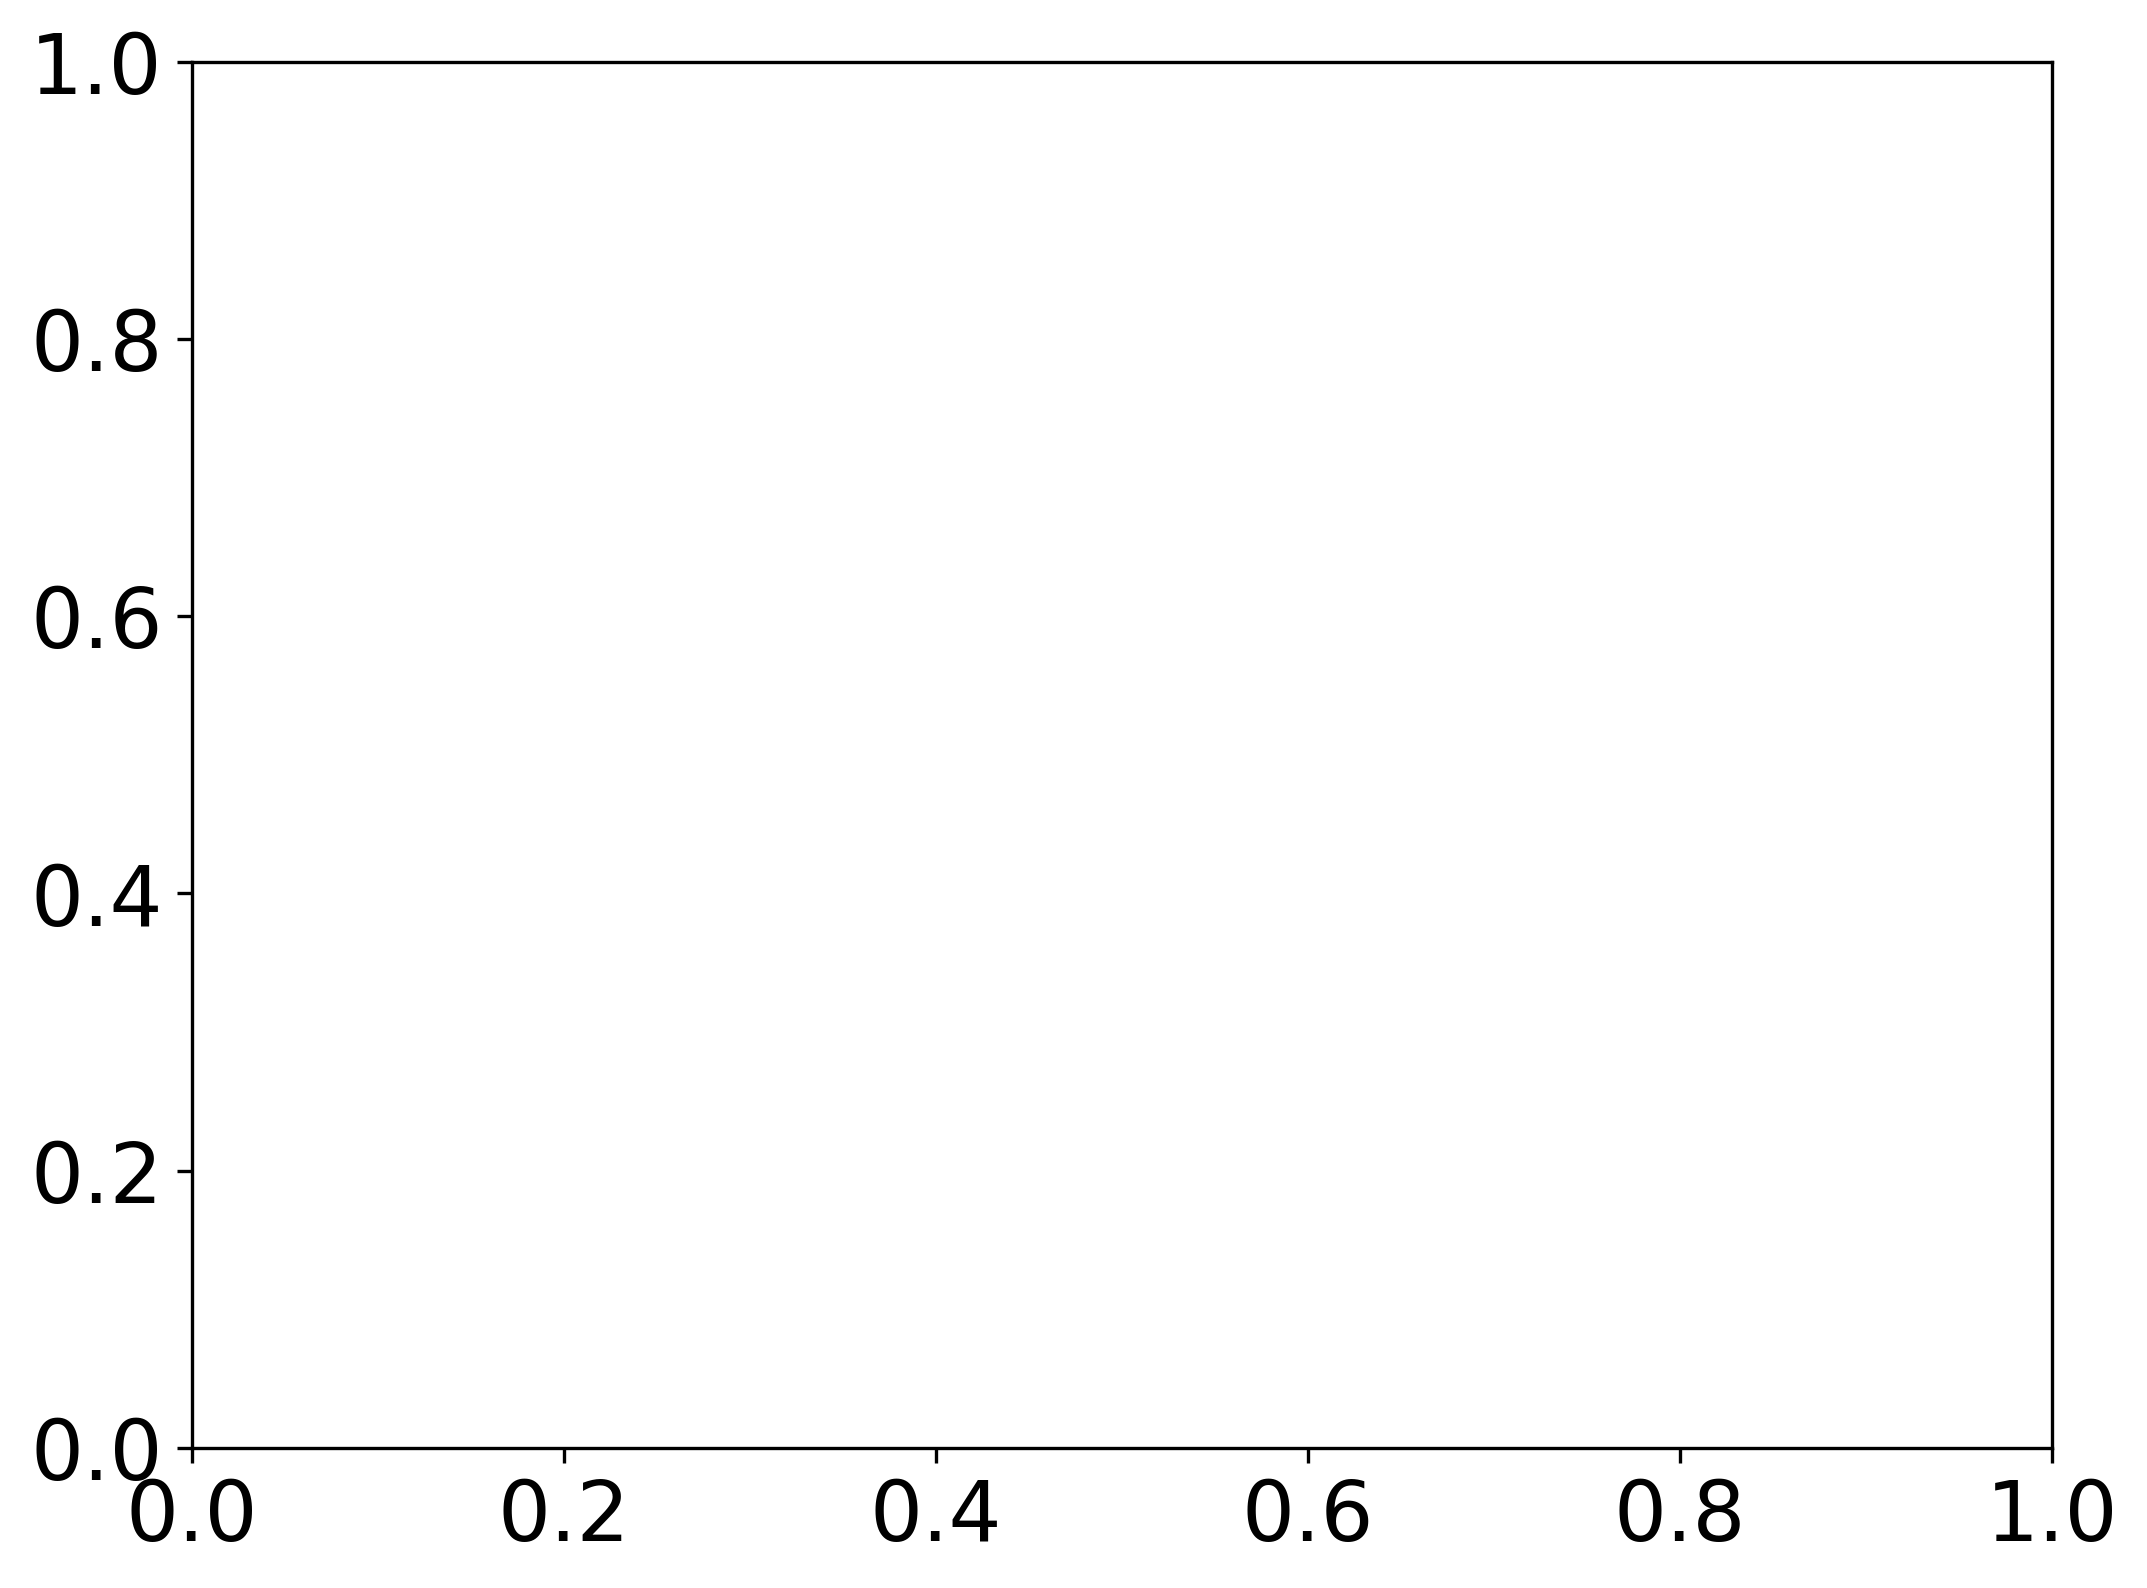

In [327]:
print("features.shape =", scaledfeatures.shape)
print("targets.shape =",  targets.shape)

# Turn features and targets to numoy arrays for plot_decision_regions 
X = scaledfeatures_pd.values
y = targets.values.reshape(10189,)

# plot_decision_regions can only plot 2 features at a time so the other 14 features must be 0
# Create a matrix of zeros with the same shape as features
X_new = np.zeros_like(X)
# Replace the first two columns with the actual feature values
X_new[:, :2] = X[:, :2]
X_new = X_new[:, :2]


plt.figure(figsize=(8,6))
model = KMeans(n_clusters=3, random_state=30) #predicts 0,1,2
model.fit(X)
plot_decision_regions(X, y, clf=model, legend=0, markers = '...', colors = 'lightgray,violet,teal,yellow,red,blue,green,orange,purple,black')
plt.scatter(X_0["resi 16"], y_0["Energy_range"], s = 30, c = 'lightgray', edgecolors='k')
plt.scatter(X_1["resi 16"], y_1["Energy_range"], s = 30, c = 'violet',    edgecolors='k')
plt.scatter(X_2["resi 16"], y_2["Energy_range"], s = 30, c = 'teal',      edgecolors='k')
plt.scatter(X_3["resi 16"], y_3["Energy_range"], s = 30, c = 'yellow',    edgecolors='k')
plt.scatter(X_4["resi 16"], y_4["Energy_range"], s = 30, c = 'red',       edgecolors='k')
plt.scatter(X_5["resi 16"], y_5["Energy_range"], s = 30, c = 'blue',      edgecolors='k')
plt.scatter(X_6["resi 16"], y_6["Energy_range"], s = 30, c = 'green',     edgecolors='k')
plt.scatter(X_7["resi 16"], y_7["Energy_range"], s = 30, c = 'orange',    edgecolors='k')
plt.scatter(X_8["resi 16"], y_8["Energy_range"], s = 30, c = 'purple',    edgecolors='k')
plt.scatter(X_9["resi 16"], y_9["Energy_range"], s = 30, c = 'black',     edgecolors='k')

plt.xlim(0,15)
plt.ylim(0,10);
#plt.savefig('ClustersBad.png', dpi = 300)

# 4. Build an elbow curve for your clustering scheme. 
How many clusters does the elbow suggest? 
- Seems like the Elbow curve suggests using 7-8 clusters
- A large issue with the data I fed into k-means clustering is because the amino acids were assigned numerical numbers are not exactly fine tuned such that numbers close to each other are related exactly
- It is difficult to assign numbers from 1-20 such that the amino acids are arranged from similar to dissimilar because many there are many chemical properties to consider
- Since k-means clsutering is done such that numbers near each other and considered similar, this method may not be the best in solving this problem

In [323]:
inertias = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaledfeatures)
    inertias.append(kmeans.inertia_)

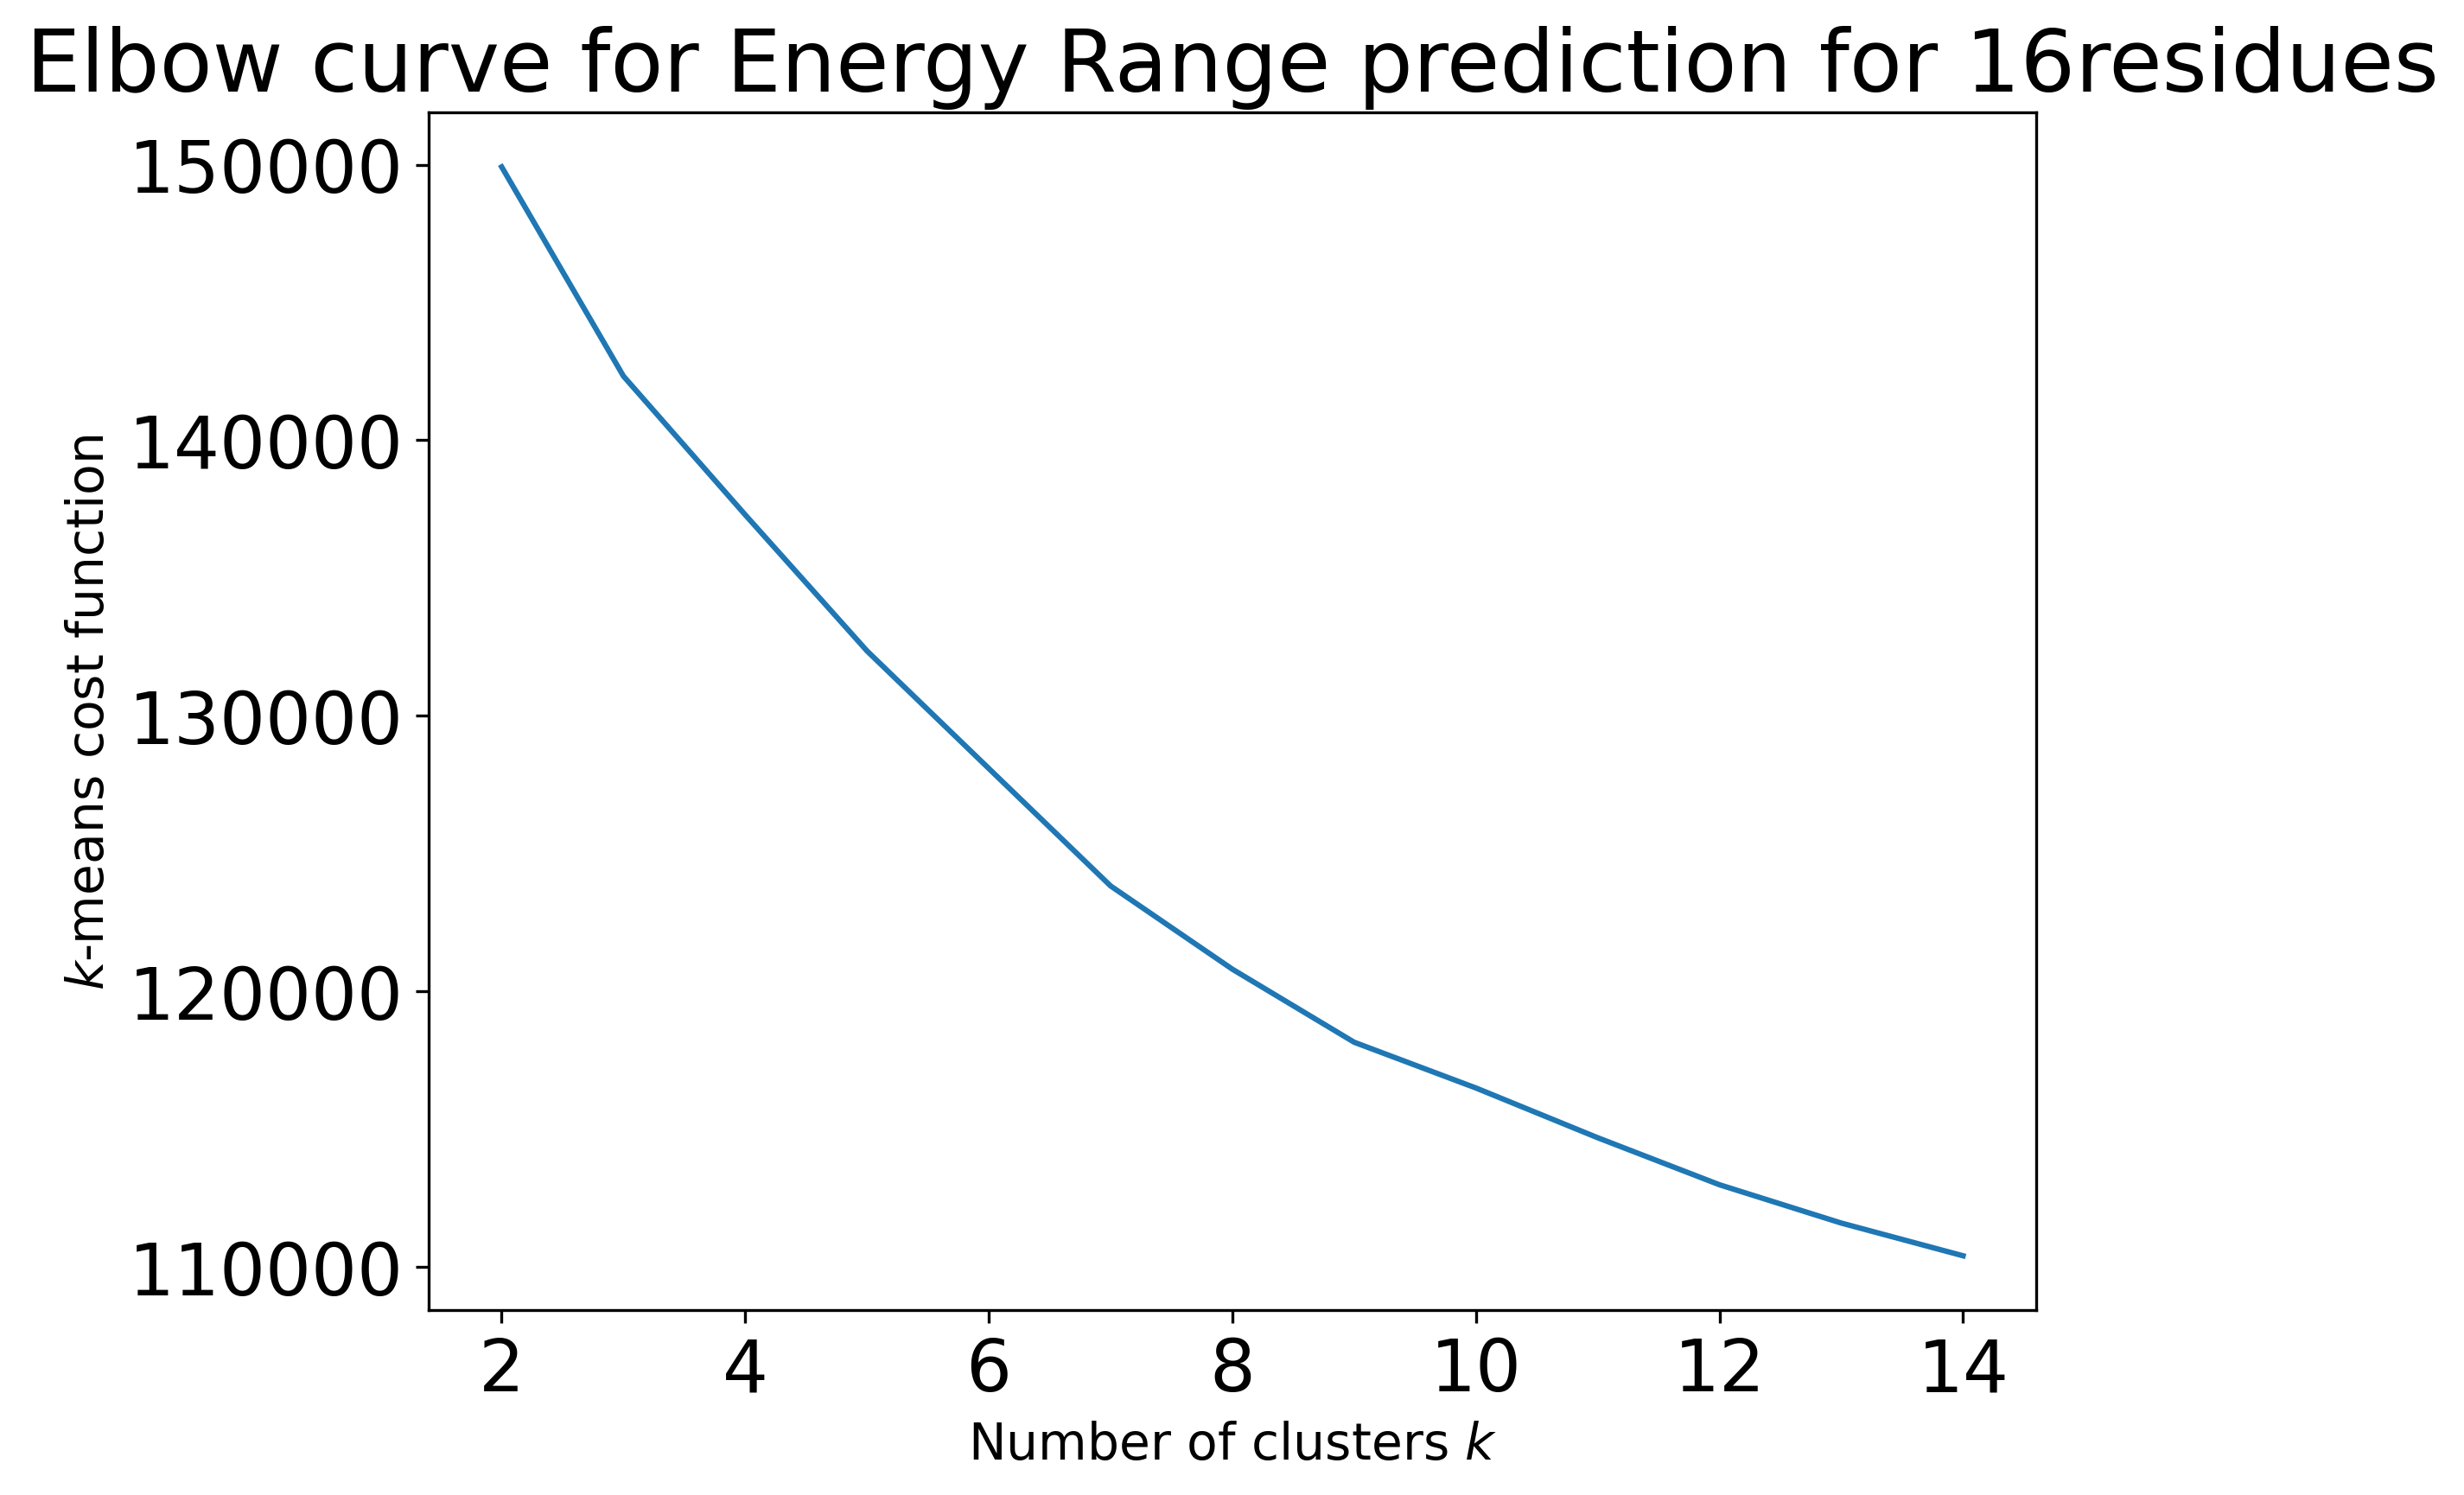

In [324]:
fig = plt.figure(figsize=(8, 6))
plt.plot(range(2, 15), inertias)
#plt.grid(True)
plt.title('Elbow curve for Energy Range prediction for 16residues');
plt.xlabel('Number of clusters $k$', fontsize = 14);
plt.ylabel('$k$-means cost function', fontsize = 14);
#plt.savefig('16residues_EnergyRange.png', dpi = 300)

## Retry K-means clustering after running PCA to get 2 principal components so we can visulize data using plot_decision_regions

- By making the kmeans clustering model choose 10 clusters, using only the first 2 principal compoenents as features, the output is very poor and doesnt encompass the data very well at all.
- Suprisingly, kNN worked way better!

In [360]:
#  Perform PCA
X = scaledfeatures
pca_2  = decomposition.PCA(n_components=2, random_state=0)
pca_5  = decomposition.PCA(n_components=5, random_state=0)
pca_10 = decomposition.PCA(n_components=10, random_state=0)


X_proj_2  = pca_2.fit_transform(X)  #the projected data set - it lives in a new feature space with 10,189 objects and 2 features
X_proj_5  = pca_5.fit_transform(X)  #the projected data set - it lives in a new feature space with 10,189 objects and 5 features
X_proj_10 = pca_10.fit_transform(X) #the projected data set - it lives in a new feature space with 10,189 objects and 100 features

X_proj_2_pd = pd.DataFrame.from_dict(X_proj_2)
X_proj_2_pd


,0,1
0,2.757474,0.487635
1,2.406267,0.123752
2,3.340290,1.087280
3,0.395360,-1.627614
4,-1.003650,-0.288378
...,...,...
10184,-1.383284,0.966905
10185,0.280704,0.108671
10186,-0.043396,0.663423
10187,-1.532284,0.562665


In [361]:
X_0 = X_proj_2_pd.loc[y_0.index]
X_1 = X_proj_2_pd.loc[y_1.index]
X_2 = X_proj_2_pd.loc[y_2.index]
X_3 = X_proj_2_pd.loc[y_3.index]
X_4 = X_proj_2_pd.loc[y_4.index]
X_5 = X_proj_2_pd.loc[y_5.index]
X_6 = X_proj_2_pd.loc[y_6.index]
X_7 = X_proj_2_pd.loc[y_7.index]
X_8 = X_proj_2_pd.loc[y_8.index]
X_9 = X_proj_2_pd.loc[y_9.index]

print("X_0 =", X_0.shape)
print("X_1 =", X_1.shape)
print("X_2 =", X_2.shape)
print("X_3 =", X_3.shape)
print("X_4 =", X_4.shape)
print("X_5 =", X_5.shape)
print("X_6 =", X_6.shape)
print("X_7 =", X_7.shape)
print("X_8 =", X_8.shape)
print("X_9 =", X_9.shape)

X_0 = (33, 2)
X_1 = (2072, 2)
X_2 = (6156, 2)
X_3 = (714, 2)
X_4 = (380, 2)
X_5 = (227, 2)
X_6 = (32, 2)
X_7 = (22, 2)
X_8 = (7, 2)
X_9 = (16, 2)


features.shape = (10189, 2)
targets.shape = (10189, 1)



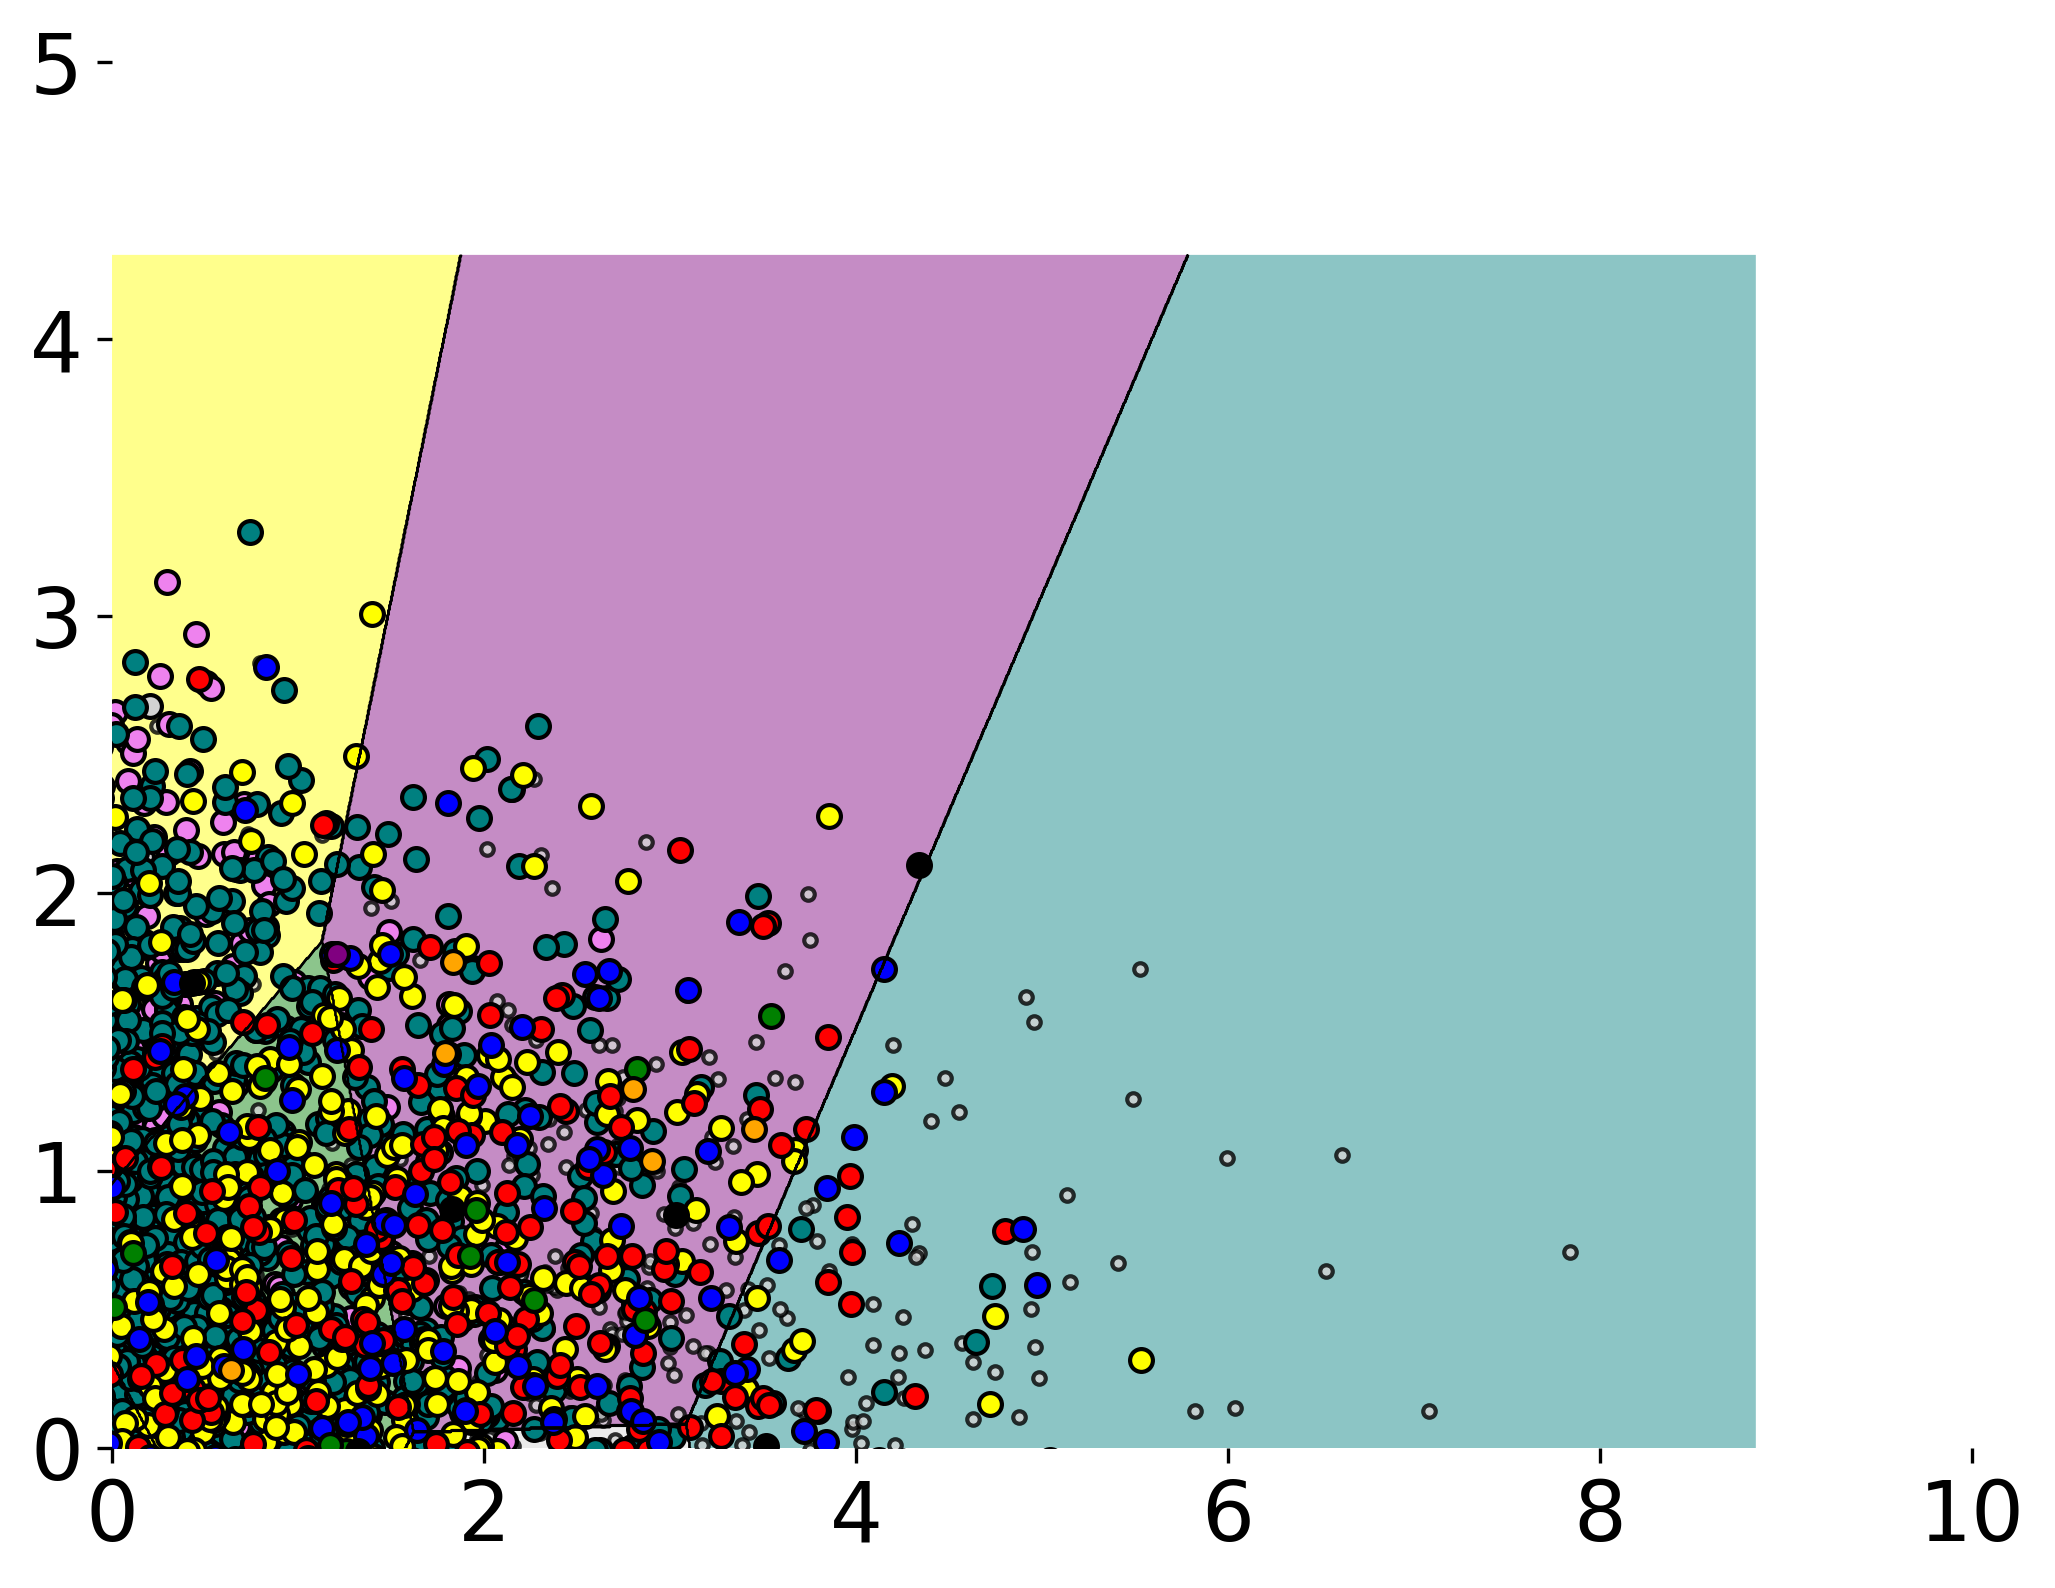

In [364]:
print("features.shape =", X_proj_2.shape)
print("targets.shape =",  targets.shape)
print()

# Turn features and targets to numoy arrays for plot_decision_regions 
X = X_proj_2
y = targets.values.reshape(10189,)

# Plot visualization
plt.figure(figsize=(8,6))
model = KMeans(n_clusters=10, random_state=30)
model.fit(X)
plot_decision_regions(X, y, clf=model, legend=0, markers = '...', colors = 'lightgray,violet,teal,yellow,red,blue,green,orange,purple,black')
plt.scatter(X_0[0], X_0[1], s = 30, c = 'lightgray', edgecolors='k')
plt.scatter(X_1[0], X_1[1], s = 30, c = 'violet',    edgecolors='k')
plt.scatter(X_2[0], X_2[1], s = 30, c = 'teal',      edgecolors='k')
plt.scatter(X_3[0], X_3[1], s = 30, c = 'yellow',    edgecolors='k')
plt.scatter(X_4[0], X_4[1], s = 30, c = 'red',       edgecolors='k')
plt.scatter(X_5[0], X_5[1], s = 30, c = 'blue',      edgecolors='k')
plt.scatter(X_6[0], X_6[1], s = 30, c = 'green',     edgecolors='k')
plt.scatter(X_7[0], X_7[1], s = 30, c = 'orange',    edgecolors='k')
plt.scatter(X_8[0], X_8[1], s = 30, c = 'purple',    edgecolors='k')
plt.scatter(X_9[0], X_9[1], s = 30, c = 'black',     edgecolors='k')

plt.xlim(0,10)
plt.ylim(0,5);
#plt.savefig('ClustersBad.png', dpi = 300)

## 5. Take a look at other clustering algorithms on sklearn: 
- Wasn't very successful on getting these to work well.

## Density based clustering

[0]
Estimated number of clusters: 1
Estimated number of noise points: 0


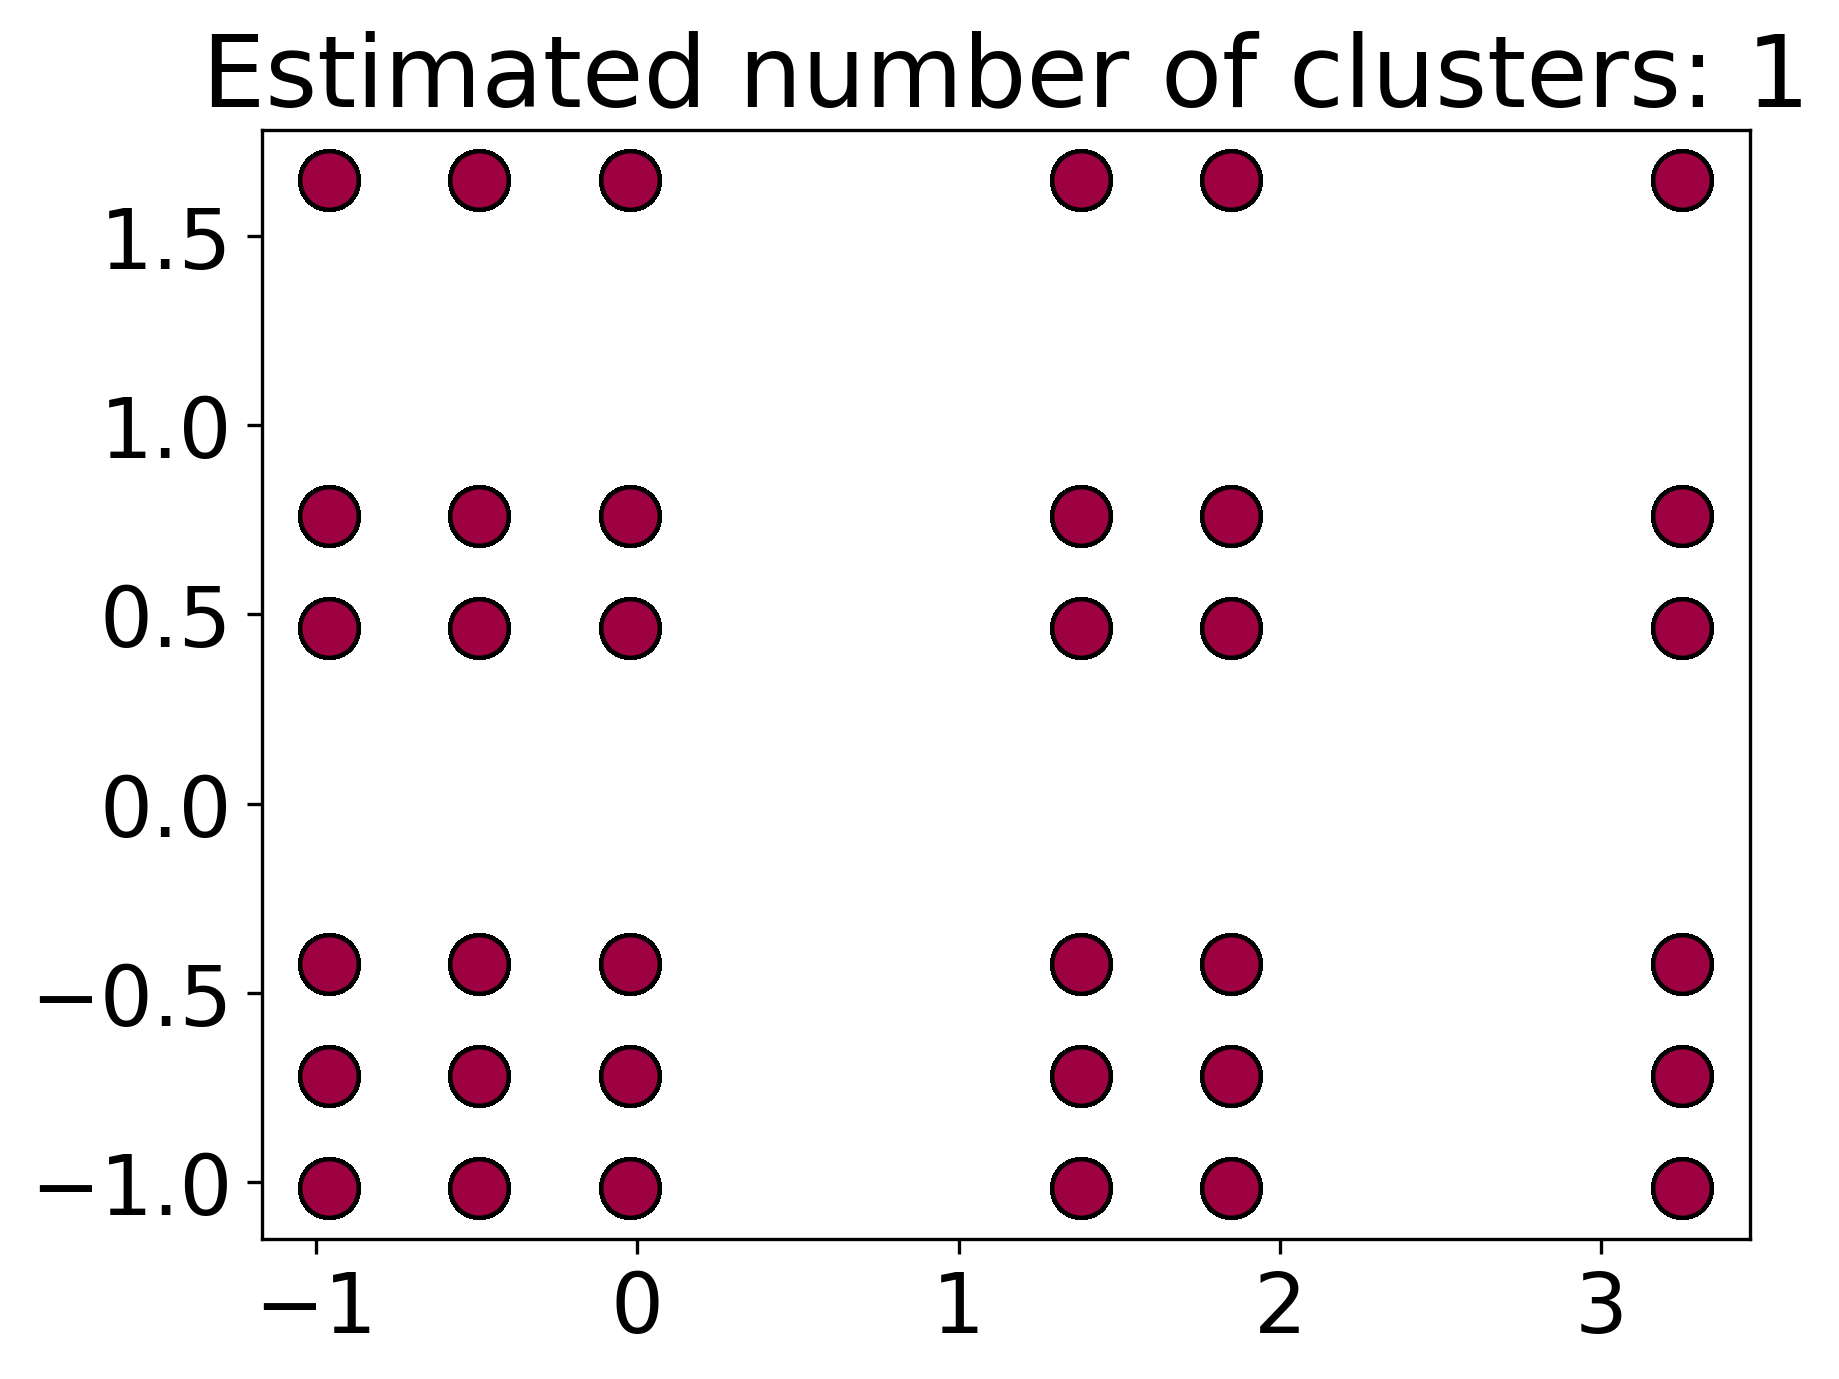

In [318]:
# #############################################################################
# Compute DBSCAN
X = scaledfeatures
db = DBSCAN(eps=1000, min_samples=2).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

print(np.unique(labels))

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters:     %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# #############################################################################

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## OPTICS

Estimated number of clusters: 1
Estimated number of noise points: 51


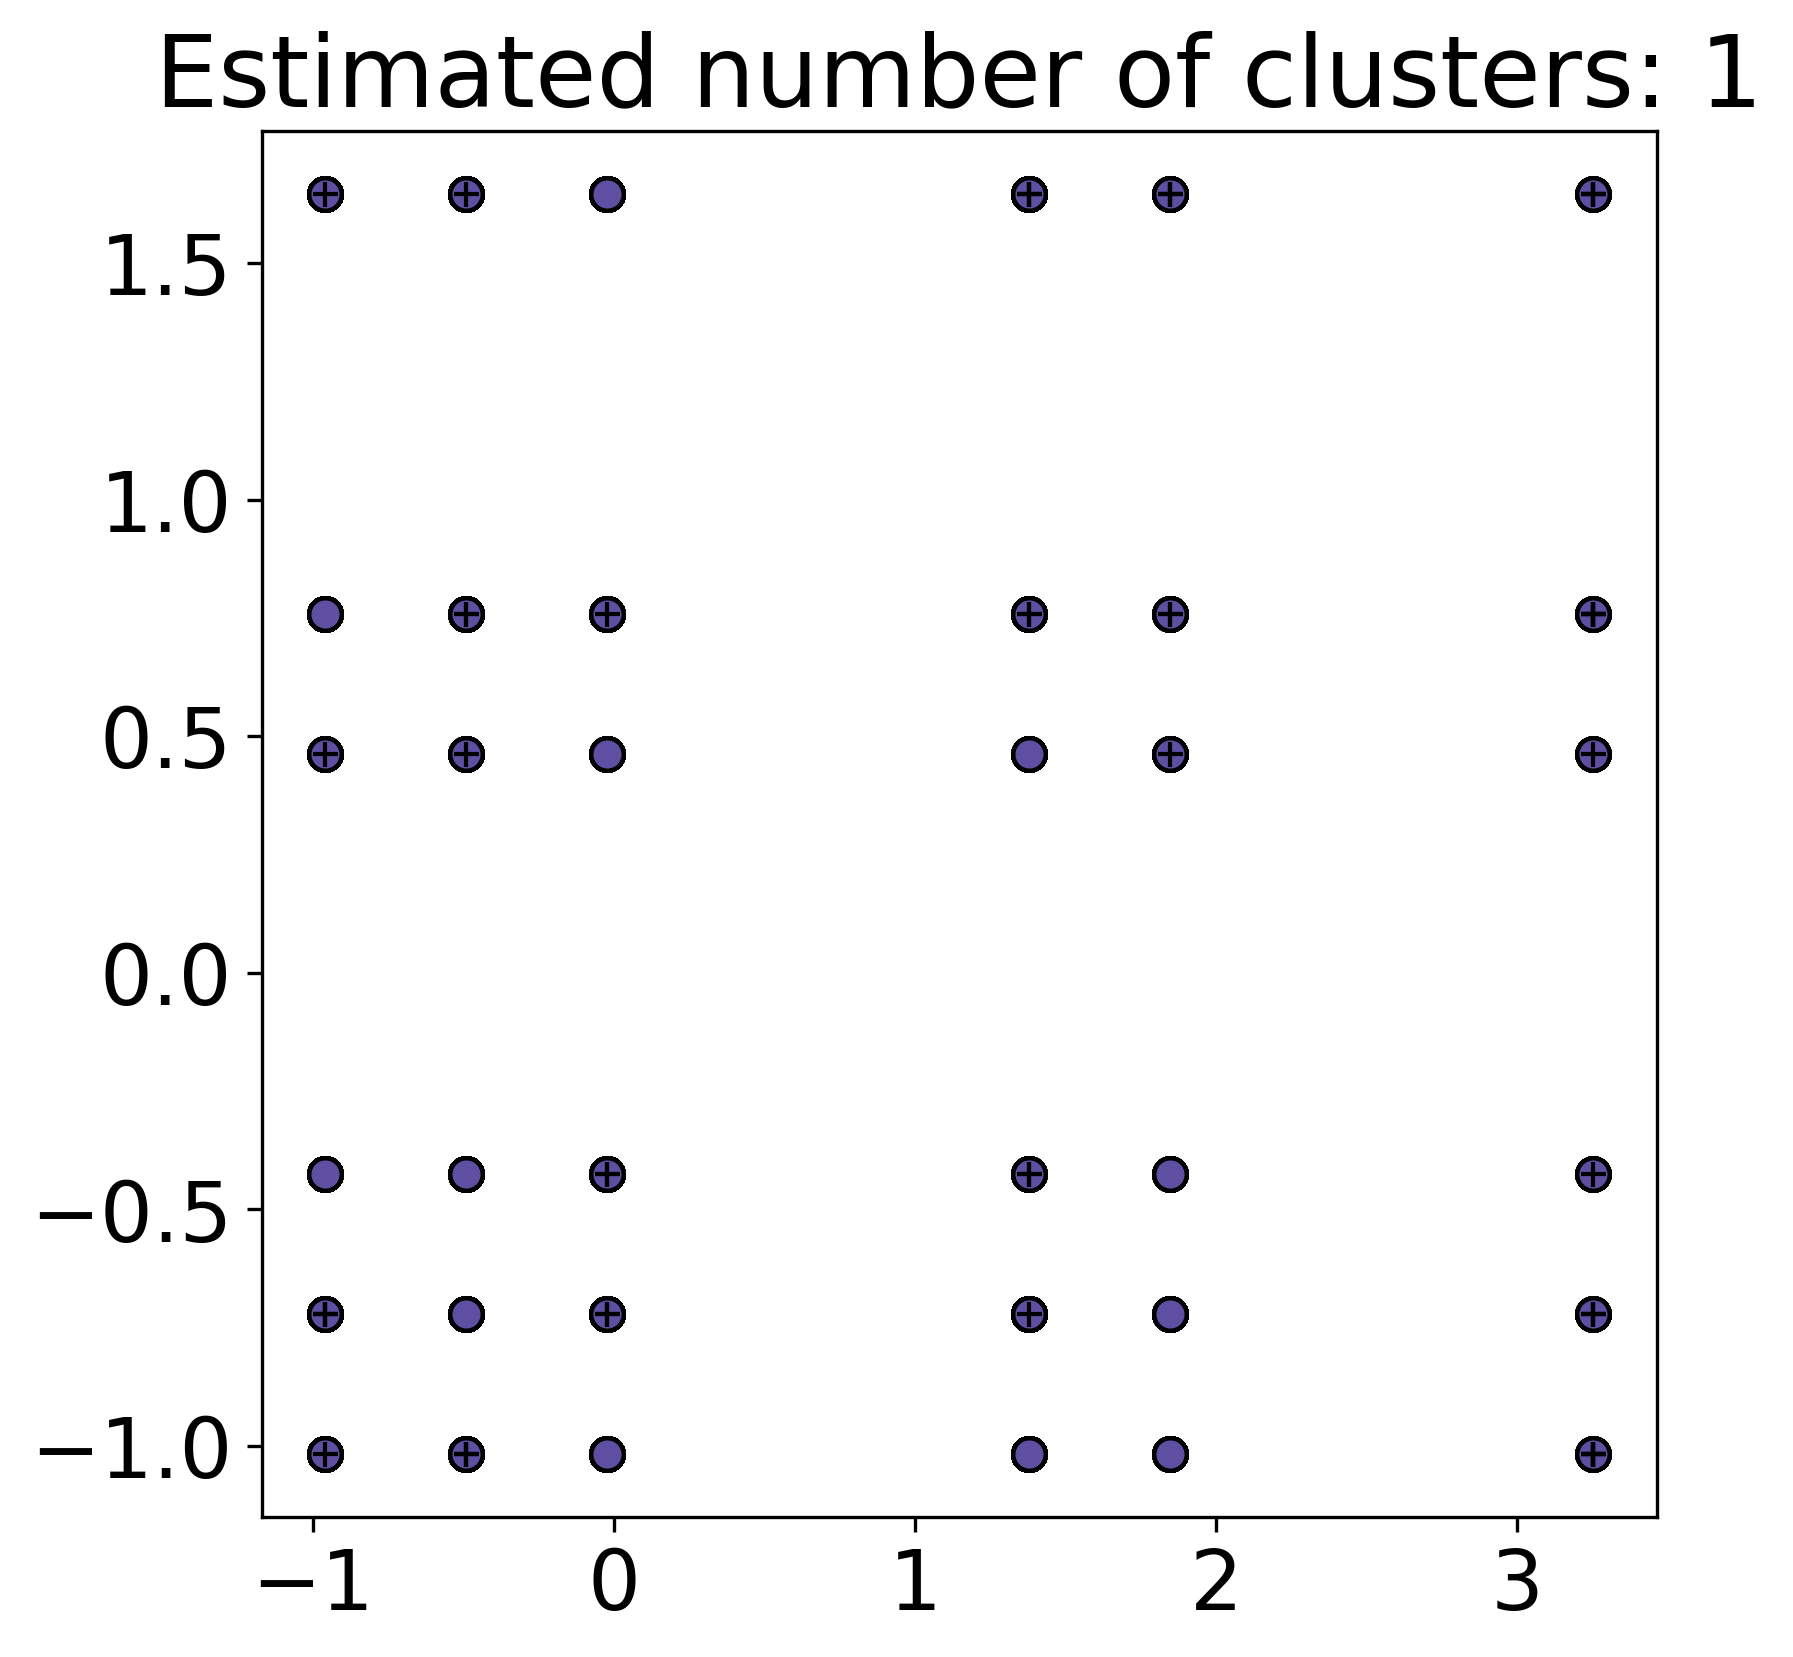

In [365]:
# #############################################################################
X = scaledfeatures
op = OPTICS(xi=0.005, min_cluster_size=.05).fit(X)

labels = op.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Black removed and is used for noise instead.
unique_labels = np.unique(labels)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(6,6))

for klass, color in zip(unique_labels[1:], colors[1:]):

    Xk = X[op.labels_ == klass]
    plt.scatter(Xk[:, 0], Xk[:, 1], 60, np.array([color,]),\
                'o', edgecolors='k',linewidths=1, )#, ls = 'None')
    
plt.plot(X[op.labels_ == -1, 0], X[op.labels_ == -1, 1], 'k+', ls = 'None')

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()